Question 1

Radius (r): 9.742360096347989
Center (x, y): (106.0, 256.0)


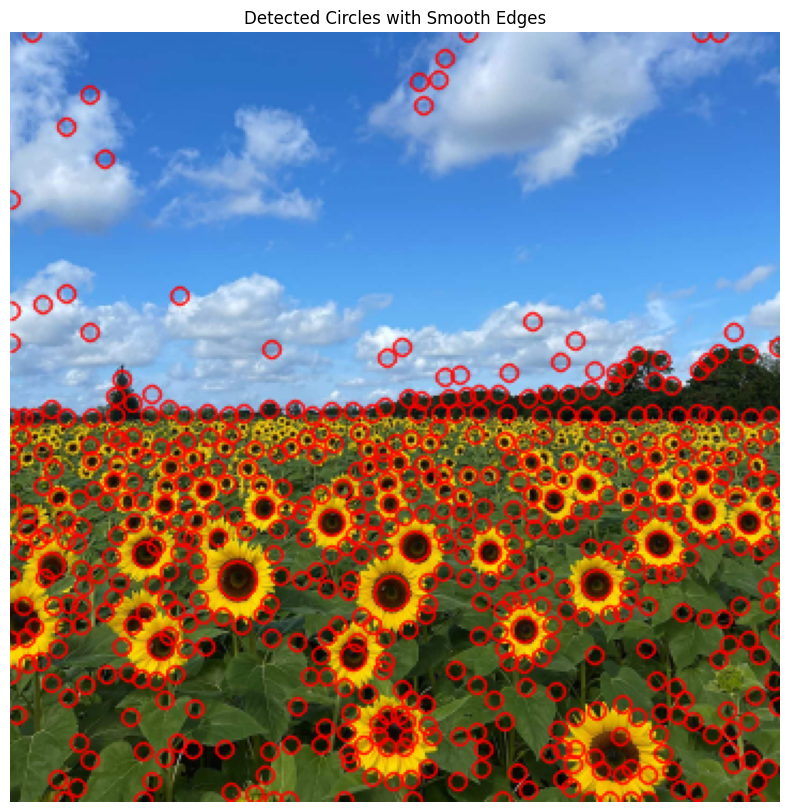

In [3]:
import cv2 as cv
import numpy as np
from skimage.feature import blob_log
import matplotlib.pyplot as plt
from math import sqrt

# Read the image
img = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv.GaussianBlur(gray, (9,9), 0.1)
laplacian = cv.Laplacian(blurred, cv.CV_64F)


# Define parameters for blob detection
min_sigma = 3
max_sigma = 10
threshold = 4

# Detect blobs using Laplacian of Gaussians
blobs = blob_log(laplacian, min_sigma=min_sigma,max_sigma=max_sigma, threshold=threshold)
# blobs=blob_log(laplacian, min_sigma=1, max_sigma=30, threshold=0.1, overlap=0.01, log_scale=False)

blobs[:, 2] = blobs[:, 2] * sqrt(2)

max_radius_index = np.argmax(blobs[:, 2])
largest_circle_params = blobs[max_radius_index]
y, x, r = largest_circle_params
print(f"Radius (r): {r}")
print(f"Center (x, y): ({x}, {y})")

# Draw circles on the original grayscale image
for blob in blobs:
    y, x, r = blob  # Blob format is (y, x, r)
    cv.circle(img, (int(x), int(y)), int(r), (0,0,255),thickness=1, lineType=cv.LINE_AA)  # Draw circles in white

# Display the result

# cv.imshow('Detected Circles', gray_three_channel)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Circles with Smooth Edges')
plt.show()

Question 3

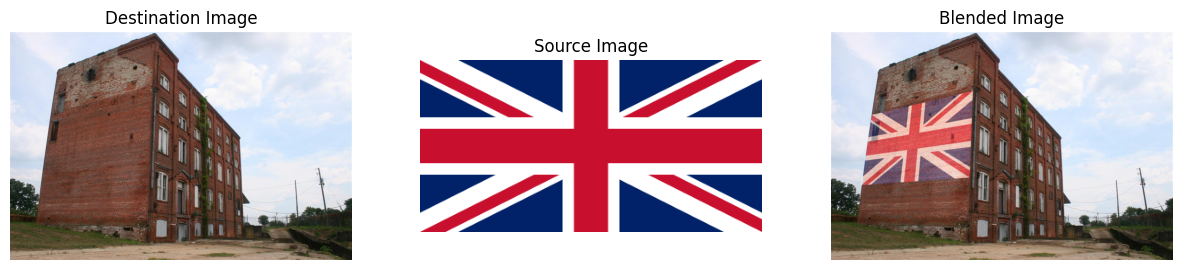

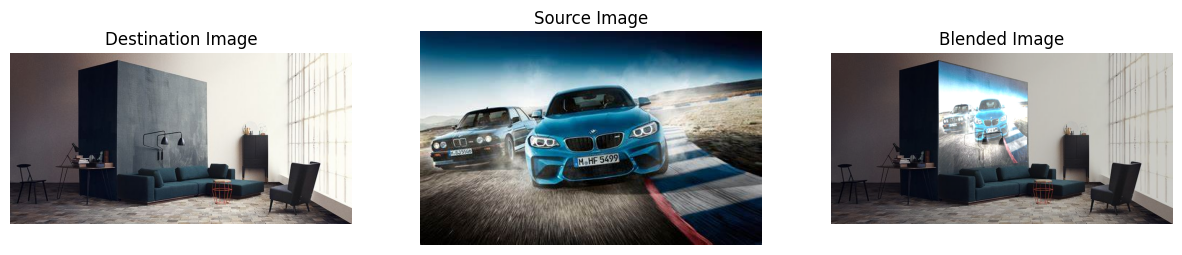

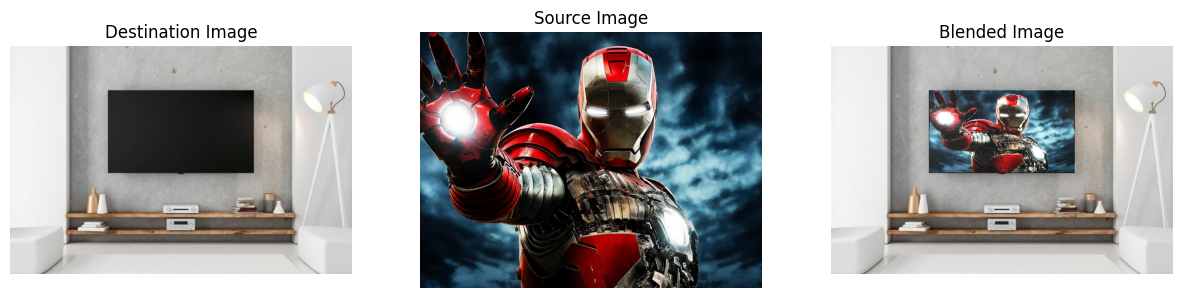

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

images = [cv.imread('building.JPG'),cv.imread('wall.jpg'), cv.imread('tv.jpg')]
coffs = [(1, 0.5, 0.2), (0.8, 1, 0), (1, 1, 0)]
source_img = [cv.imread('Flag_of_the_United_Kingdom.svg.png'),cv.imread('car.jpeg'),cv.imread('man.jpeg')]
for i in range(len(images)):
    flag=source_img[i]
    points = []
    clicks = 0
    def click(event, x, y, flags, params):
        if event == cv.EVENT_LBUTTONDOWN:
            points.append([x,y])
    img = images[i]
    cv.imshow('image', img)
    cv.setMouseCallback('image', click)
    cv.waitKey(0)
    cv.destroyAllWindows()

    if flag is None:
        print(f"Error: Could not load source image '{source_images[i]}'")
        continue
    
    w, h = flag.shape[1], flag.shape[0]
    pts_src = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]])
    pts_dst = np.array(points)
    h, status = cv.findHomography(pts_src, pts_dst)
    im_out = cv.warpPerspective(flag, h, (img.shape[1], img.shape[0]))
    blended_img = cv.addWeighted(img, coffs[i][0], im_out, coffs[i][1], coffs[i][2])
    #blended_img = cv.addWeighted(img, 1, im_out, 0.4, 0.2)
    im=[img, flag, blended_img]
    cv.imshow("Blended Image", blended_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    fig, ax = plt.subplots(1, 3, figsize=(15, 10), facecolor="white")
    titles = ['Destination Image', 'Source Image', 'Blended Image']
    for j in range(3):
        transformed_img_ = cv.cvtColor(im[j], cv.COLOR_BGR2RGB)
        ax[j].axis('off')
        ax[j].imshow(transformed_img_)
        ax[j].set_title(titles[j])
    

plt.show()


    
    
    
    

